# Exploratory Data Analysis


---

1. **Import Required Libraries**

I will begin by importing the necessary Python libraries for data handling and exploration.

In [11]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns   
import warnings
import os 

# Step 0. Move up one directory level to where the dataset file is located, enabling pandas to find and load the CSV successfully
print(os.getcwd())

/Users/nataliewaugh/Documents/DataCode/Detecting_Money_Laundering_Patterns-/jupyter_notebooks


**Load the clean dataset**

In [12]:
#Step 1. Load the dataset
data = pd.read_csv('/Users/nataliewaugh/Documents/DataCode/Detecting_Money_Laundering_Patterns-/data/cleaned_money_laundering_datasetrevised.csv') 

#Step 2. show the first few rows of the dataset
data.head()

,Origin Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Domestic or Cross-Border,Origin Country Category,Destination Tax Haven Flag
0,Brazil,3267530.0,Offshore Transfer,2023-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore,Cross-Border,Upper-Middle / Partial Regulated,Non-Tax Haven
1,China,4965767.0,Stocks Transfer,2023-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas,Cross-Border,Upper-Middle / Partial Regulated,Non-Tax Haven
2,UK,94168.0,Stocks Transfer,2023-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland,Cross-Border,High Income / Regulated,Tax Haven
3,UAE,386420.0,Cash Withdrawal,2023-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama,Cross-Border,High Income / Tax Haven,Non-Tax Haven
4,South Africa,643378.0,Cryptocurrency,2023-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg,Cross-Border,Upper-Middle / Regulated,Non-Tax Haven


## Initial Analysis 

This analysis begins with basic descriptive statistics — specifically, the mean, median, and mode of the numerical columns — to uncover initial patterns in the dataset.

In [13]:
# Step 12. Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt


# Step 13. Select numeric + boolean columns
numeric_cols = data.select_dtypes(include=['float64', 'int64', 'bool']).columns

# Step 14. Create stats DataFrame
stats = pd.DataFrame(index=numeric_cols, columns=[
    'mean', 'median', 'mode', 'min', 'max', 'std',
    '25%', '50%', '75%', 'skewness', 'kurtosis',])

# Step 15. Loop through each column
for col in numeric_cols:
    col_data = data[col]
    
    stats.loc[col, 'mean'] = col_data.mean()
    stats.loc[col, 'median'] = col_data.median()
    stats.loc[col, 'mode'] = col_data.mode().iloc[0] if not col_data.mode().empty else None
    stats.loc[col, 'min'] = col_data.min()
    stats.loc[col, 'max'] = col_data.max()

# Step 16. Skip quantiles and advanced stats for booleans
    if col_data.dtype != 'bool':
        stats.loc[col, 'std'] = col_data.std()
        stats.loc[col, '25%'] = col_data.quantile(0.25)
        stats.loc[col, '50%'] = col_data.quantile(0.50)
        stats.loc[col, '75%'] = col_data.quantile(0.75)
        stats.loc[col, 'skewness'] = col_data.skew()
        stats.loc[col, 'kurtosis'] = col_data.kurtosis()

# Step 17. Display nicely
display(stats.round(2))

,mean,median,mode,min,max,std,25%,50%,75%,skewness,kurtosis
Amount (USD),2501817.6672,2501310.5,2655927.0,10032.0,4999812.0,1424364.278488,1279005.25,2501310.5,3722416.75,0.011124,-1.172878
Reported by Authority,0.2005,0.0,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN
Money Laundering Risk Score,5.5264,6.0,9,1,10,2.893603,3.0,6.0,8.0,-0.011003,-1.243735
Shell Companies Involved,4.4694,4.0,0,0,9,2.879773,2.0,4.0,7.0,0.005806,-1.22295


The Initial analysis of the data shows:

`Amount (USD)`

* **Mean**: 2,501,817. On average, transactions involve about \$2.5 million.
* **Median**: 2,501,310. The middle transaction amount is also about \$2.5 million, very close to the mean, so the distribution might be roughly symmetric.
* **Mode**: 2,655,927. The most common transaction amount is about \$2.65 million.
* **Max**: 4,999,812. The largest transaction is nearly \$5 million.
* **Standard Deviation**: 1,424,364. There is a high spread in transaction amounts, but because mean ≈ median, it suggests the spread isn't caused by strong outliers.
* **25%**: 1,279,005.25 — 25% of all transactions fall below this amount. This shows what a “low-end” transaction looks like within the dataset.
* **50%**: 2,501,310.50 — This is the **median**, meaning half the transactions are below this value and half are above. It's useful for understanding the "typical" transaction.
* **75%**: 3,722,416.75 — 75% of transactions are below this amount, and 25% are above. This highlights what a relatively **large** transaction looks like within the context of the data.
* **Skewness**: \~0.01. The distribution is nearly symmetrical.
* **Kurtosis**: -1.17. The distribution is flatter than normal, meaning fewer extreme outliers than expected in a bell curve.

---

`Reported by Authority` (Boolean: True = reported, False = not)

* **Mean**: 0.2005. About **20%** of transactions were reported by authorities.
* **Median**: 0.0. More than half of the transactions were **not reported**.
* **Mode**: False. The most common value is **False**, confirming most cases are unreported.
* **Max**: True. Some transactions were reported.
* **Standard Deviation**: 0.400. Reflects a mix of True and False values, but skewed toward False.
* **25%**: 0.0 — At least 25% of the values are definitely unreported.
* **50%**: 0.0 — The median again confirms that at least half are unreported.
* **75%**: 0.0 — Even 75% of the values are False (not reported), which shows that only a small minority were flagged by authorities.
* **Skewness**: 1.50. Strong **right skew** — very few 1s (True values).
* **Kurtosis**: 0.24. Slightly peaked compared to a normal distribution.

**Conclusion**: Most transactions go unreported; this variable could help flag rare, suspicious activity.

---

`Money Laundering Risk Score` (0–10 scale)

* **Mean**: \~5.53. Average risk score is around 5.5.
* **Median**: 6. Half the transactions have a score below 6, half above.
* **Mode**: 9. Most common score is **9**, suggesting many high-risk transactions.
* **Max**: 10. Some transactions score the maximum risk.
* **Standard Deviation**: 2.89. There's a reasonable spread of scores.
* **25%**: 3.0 — One-quarter of transactions are low-risk (below 3).
* **50%**: 6.0 — The median; half of all transactions score below 6, half above.
* **75%**: 8.0 — 25% of transactions have risk scores **higher than 8**, indicating a significant tail of high-risk activity.
* **Skewness**: \~-0.01. Very slight **left skew**, almost symmetric.
* **Kurtosis**: -1.24. Flatter distribution — values more evenly spread than a bell curve.

---

`Shell Companies Involved` (0–9)

* **Mean**: \~4.47. On average, \~4.5 shell companies are involved per transaction.
* **Median**: 4. Half of transactions involve **4 or fewer** shell companies.
* **Mode**: 0. Many transactions involve **no** shell companies at all.
* **Max**: 9. Some transactions involve up to **9** shell companies.
* **Standard Deviation**: 2.88. Moderate variability in number of shell companies involved.
* **25%**: 2.0 — A quarter of transactions involve 2 or fewer shell companies.
* **50%**: 4.0 — The median; half of all transactions involve fewer than 4 shell companies.
* **75%**: 7.0 — A quarter of all transactions involve 7 or more shell companies — potentially suspicious activity.
* **Skewness**: \~0.01. Almost symmetrical distribution.
* **Kurtosis**: -1.22. Flat distribution with fewer outliers.

---

Next I will visualise the distribution for the four numerical columns.

We will plot the data to check the distribution. 

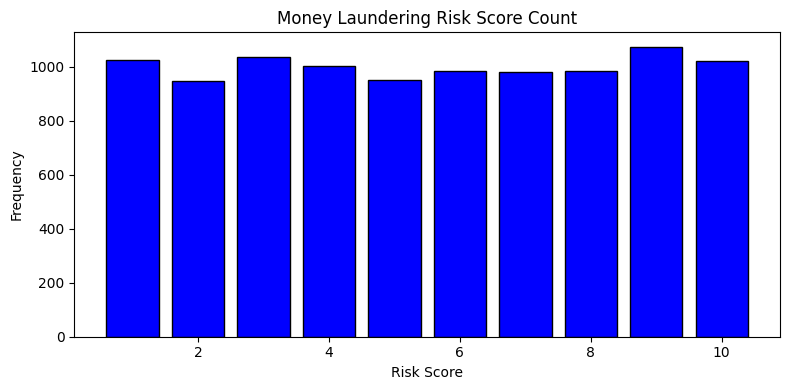

In [14]:
# Step 18. Compute value counts
risk_counts = data['Money Laundering Risk Score'].value_counts().sort_index()

# Step 18.1 Create a bar chart using Matplotlib
plt.figure(figsize=(8, 4))
plt.bar(risk_counts.index, risk_counts.values, color='blue', edgecolor='black')

# Add titles and labels
plt.title("Money Laundering Risk Score Count")
plt.xlabel("Risk Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

There is a largely even spread of risk scores assigned to transactions.

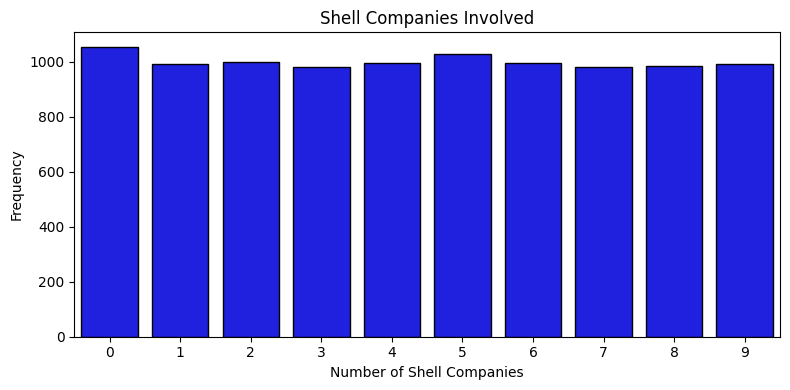

In [15]:
# Step 19. Create a histogram for 'Shell Companies Involved' to visualize the distribution of shell companies
plt.figure(figsize=(8, 4))
sns.countplot(x='Shell Companies Involved', data=data, color='blue', edgecolor='black')
plt.title("Shell Companies Involved")
plt.ylabel("Frequency")
plt.xlabel("Number of Shell Companies")
plt.tight_layout()
plt.show()

This histogram shows there is also an even spread of transactions involving shell companies 

In [16]:
#Step 20. Calculate the standard deviation for 'Amount (USD)'
std_amount = data['Amount (USD)'].std()
print(f"Standard Deviation for Amount (USD): ${std_amount:,.2f}")

Standard Deviation for Amount (USD): $1,424,364.28


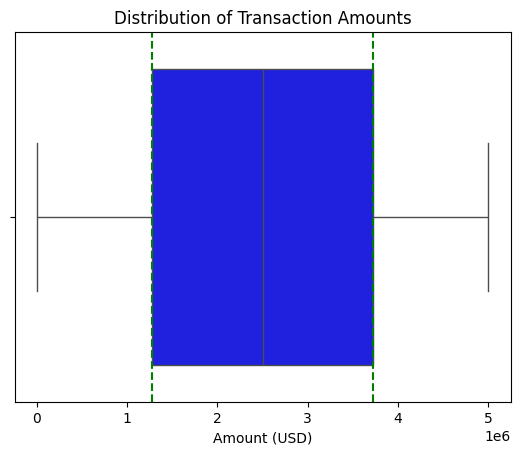

In [9]:
#Step 21. Create a boxplot for 'Amount (USD)' to visualize the distribution of transaction amounts
sns.boxplot(x=data['Amount (USD)'], color='blue')

q1 = data['Amount (USD)'].quantile(0.25)
q3 = data['Amount (USD)'].quantile(0.75)

plt.axvline(q1, color='green', linestyle='--')
plt.axvline(q3, color='green', linestyle='--')

plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (USD)')

plt.show()

This box plot shows that the mid point for most transactions is $2.5million, most transactions cluster around $1.5m and $3.75m. There are no extreme outliers beyond $5m and there can't be a transaction which is less than $0. 

In [17]:
#Step 22. Calculate the mean Money Laundering Risk Score by Industry
data.groupby('Industry')['Money Laundering Risk Score'].mean().sort_values()

Industry
Luxury Goods    5.373544
Oil & Gas       5.427843
Real Estate     5.455301
Casinos         5.556282
Arms Trade      5.570721
Construction    5.583562
Finance         5.711864
Name: Money Laundering Risk Score, dtype: float64

Bearing in mind the `Money Laundering Risk Score`range from 1-9 inclusive, there isn't a great deal of difference between the low and the highest score.

---

## Advanced Analysis 

We will do a Pearson Correlation Analysis, to see if two variables move together. This will help you quantify the relationship between numerical variables, such as:
- `Amount (USD)` and `Money Laundering Risk Score`
- `Shell Companies Involved` and `Risk Score`
- `Amount (USD)` and `Shell Companies Involved`


In [18]:
# Step 23.Only include numerical columns
numerical_cols = ['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved']

# Step 24. Compute correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Step 25. Display it
print(correlation_matrix)

                             Amount (USD)  Money Laundering Risk Score  \
Amount (USD)                     1.000000                     0.016529   
Money Laundering Risk Score      0.016529                     1.000000   
Shell Companies Involved        -0.017905                    -0.019262   

                             Shell Companies Involved  
Amount (USD)                                -0.017905  
Money Laundering Risk Score                 -0.019262  
Shell Companies Involved                     1.000000  


### Correlation Summary of Numerical Variables


| Variable Pair                            | Correlation Coefficient | Interpretation |
|------------------------------------------|--------------------------|----------------|
| Amount (USD) & Risk Score                | 0.0165                   | Very weak positive correlation – almost no relationship |
| Amount (USD) & Shell Companies Involved  | -0.0179                  | Very weak negative correlation – almost no relationship |
| Risk Score & Shell Companies Involved    | -0.0193                  | Very weak negative correlation – almost no relationship |

These results indicate that there is **no meaningful linear relationship** between these variables. For instance, larger transaction amounts are **not necessarily** associated with higher risk scores or more shell companies. This suggests that the `Money Laundering Risk Score` may be influenced more by other factors, such as `Industry`, `Country`, or whether the transaction was `Reported by Authority`.

In [19]:
# Step 26. Visualize the correlation matrix using a heatmap in plotly.
import plotly.express as px

fig = px.imshow(
    correlation_matrix,
    text_auto='.2f',  # Shows the correlation values on the heatmap
    color_continuous_scale='RdBu_r',  # Similar to 'coolwarm'
    title='Correlation Between Numerical Variables',
    aspect='auto'
)
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40))
fig.show()

In order to calculate the relationships with categorical data, we'll explore the Chi Squared test, 
which is a statistical method used to determine if there is a significant association between two categorical 
variables. This test will help us understand if the distribution of one categorical variable differs significantly across the levels of another categorical variable.

In [18]:
from scipy.stats import chi2_contingency

# Example: Chi-squared test between 'Industry' and 'Reported by Authority'
cat1 = 'Industry'
cat2 = 'Reported by Authority'

# Create a contingency table
contingency_table = pd.crosstab(data[cat1], data[cat2])

# Run the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print("P-value:", p)

Chi-squared statistic: 12.7965
Degrees of freedom: 6
P-value: 0.04638317224472215


Here the chi-Squared test assesses the relationship between `Industry` and `Reported by Authority`. The result are statistically significant (χ² = 12.80, df = 6, p = 0.046), suggesting a potential association between the variables. However, since the p-value is close to 0.05, the evidence is weak indicating meaning it should be intrepreted with caution. 

In [ ]:
# Example: Chi-squared test between 'Shell Cat, (Number of shell companies involved) and 
# 'Reported by Authority (USD)'

data['Shell_Cat'] = data['Shell Companies Involved'].apply(lambda x: '3 or more' if x >= 3 else 'Less than 3')

cat1 = 'Shell_Cat'
cat2 = 'Reported by Authority'

# Create a contingency table
contingency_table = pd.crosstab(data[cat1], data[cat2])

# Run the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print("P-value:", p)

Chi-squared statistic: 3.5725
Degrees of freedom: 1
P-value: 0.05874435676800048


The chi-Squared test assesses the relationship between `Shell Cat` and `Reported by Authority` The p-value of 0.059 is slightly above the conventional significance level of 0.05. This means we do not have strong enough evidence to conclude a statistically significant association between the number of shell companies and being reported — but the result is close to significance and may suggest a potential relationship worth further exploration with more data.

In [20]:
# Example: Chi-squared test between 'Transaction Type' and 'Amount (USD)' - Hypothesis Three 
cat1 = 'Transaction Type'
cat2 = 'Tax Haven Country'

# Create a contingency table
contingency_table = pd.crosstab(data[cat1], data[cat2])

# Run the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print("P-value:", p)

Chi-squared statistic: 41.2689
Degrees of freedom: 20
P-value: 0.0034399538602876483


Since the p-value (0.0034) is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant association between the two variables. This suggests that the observed differences between `Transaction Type` and `Tax Haven Country` are unlikely to be due to chance, and there may be a meaningful relationship between the two. 

**Save the cleaned dataset**

In [23]:
data.to_csv('/Users/nataliewaugh/Documents/DataCode/Detecting_Money_Laundering_Patterns-/data/Cleaned_Money_Laundering_Dataset.csv', index=False)